In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import pprint
import pyspark
import pyspark.sql.functions as F

from pyspark.sql.functions import col ,when
from pyspark.sql.types import StringType, IntegerType, FloatType, DateType

import utils.data_processing_bronze_table
import utils.data_processing_silver_table
import utils.data_processing_gold_table


## set up pyspark session

In [2]:
# Initialize SparkSession
spark = pyspark.sql.SparkSession.builder \
    .appName("dev") \
    .master("local[*]") \
    .getOrCreate()

# Set log level to ERROR to hide warnings
spark.sparkContext.setLogLevel("ERROR")

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/05/19 13:20:56 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


## set up config

In [3]:
# set up config
snapshot_date_str = "2023-01-01"

start_date_str = "2023-01-01"
end_date_str = "2024-12-01"

In [4]:
# generate list of dates to process
def generate_first_of_month_dates(start_date_str, end_date_str):
    # Convert the date strings to datetime objects
    start_date = datetime.strptime(start_date_str, "%Y-%m-%d")
    end_date = datetime.strptime(end_date_str, "%Y-%m-%d")
    
    # List to store the first of month dates
    first_of_month_dates = []

    # Start from the first of the month of the start_date
    current_date = datetime(start_date.year, start_date.month, 1)

    while current_date <= end_date:
        # Append the date in yyyy-mm-dd format
        first_of_month_dates.append(current_date.strftime("%Y-%m-%d"))
        
        # Move to the first of the next month
        if current_date.month == 12:
            current_date = datetime(current_date.year + 1, 1, 1)
        else:
            current_date = datetime(current_date.year, current_date.month + 1, 1)

    return first_of_month_dates

dates_str_lst = generate_first_of_month_dates(start_date_str, end_date_str)
dates_str_lst

['2023-01-01',
 '2023-02-01',
 '2023-03-01',
 '2023-04-01',
 '2023-05-01',
 '2023-06-01',
 '2023-07-01',
 '2023-08-01',
 '2023-09-01',
 '2023-10-01',
 '2023-11-01',
 '2023-12-01',
 '2024-01-01',
 '2024-02-01',
 '2024-03-01',
 '2024-04-01',
 '2024-05-01',
 '2024-06-01',
 '2024-07-01',
 '2024-08-01',
 '2024-09-01',
 '2024-10-01',
 '2024-11-01',
 '2024-12-01']

## Build Features clickstream Bronze Table

In [5]:
# create bronze datalake
bronze_clickstream_directory = "datamart/bronze/features_clickstream/"

if not os.path.exists(bronze_clickstream_directory):
    os.makedirs(bronze_clickstream_directory)

In [6]:
# run bronze backfill
for date_str in dates_str_lst:
    utils.data_processing_bronze_table.process_bronze_table_features_clickstream(date_str, bronze_clickstream_directory, spark)


2023-01-01row count: 8974
saved to: datamart/bronze/features_clickstream/bronze_features_clickstream_2023_01_01.csv
2023-02-01row count: 8974
saved to: datamart/bronze/features_clickstream/bronze_features_clickstream_2023_02_01.csv
2023-03-01row count: 8974
saved to: datamart/bronze/features_clickstream/bronze_features_clickstream_2023_03_01.csv
2023-04-01row count: 8974
saved to: datamart/bronze/features_clickstream/bronze_features_clickstream_2023_04_01.csv
2023-05-01row count: 8974
saved to: datamart/bronze/features_clickstream/bronze_features_clickstream_2023_05_01.csv
2023-06-01row count: 8974
saved to: datamart/bronze/features_clickstream/bronze_features_clickstream_2023_06_01.csv
2023-07-01row count: 8974
saved to: datamart/bronze/features_clickstream/bronze_features_clickstream_2023_07_01.csv
2023-08-01row count: 8974
saved to: datamart/bronze/features_clickstream/bronze_features_clickstream_2023_08_01.csv
2023-09-01row count: 8974
saved to: datamart/bronze/features_clickstream

## Build Features Attributes Bronze Table

In [7]:
# create bronze datalake
bronze_attributes_directory = "datamart/bronze/features_attributes/"

if not os.path.exists(bronze_attributes_directory):
    os.makedirs(bronze_attributes_directory)

In [8]:
# run bronze backfill
for date_str in dates_str_lst:
    utils.data_processing_bronze_table.process_bronze_table_features_attributes(date_str, bronze_attributes_directory, spark)


2023-01-01row count: 530
saved to: datamart/bronze/features_attributes/bronze_features_attributes_2023_01_01.csv
2023-02-01row count: 501
saved to: datamart/bronze/features_attributes/bronze_features_attributes_2023_02_01.csv
2023-03-01row count: 506
saved to: datamart/bronze/features_attributes/bronze_features_attributes_2023_03_01.csv
2023-04-01row count: 510
saved to: datamart/bronze/features_attributes/bronze_features_attributes_2023_04_01.csv
2023-05-01row count: 521
saved to: datamart/bronze/features_attributes/bronze_features_attributes_2023_05_01.csv
2023-06-01row count: 517
saved to: datamart/bronze/features_attributes/bronze_features_attributes_2023_06_01.csv
2023-07-01row count: 471
saved to: datamart/bronze/features_attributes/bronze_features_attributes_2023_07_01.csv
2023-08-01row count: 481
saved to: datamart/bronze/features_attributes/bronze_features_attributes_2023_08_01.csv
2023-09-01row count: 454
saved to: datamart/bronze/features_attributes/bronze_features_attribute

In [9]:
# inspect output
utils.data_processing_bronze_table.process_bronze_table_features_attributes(date_str, bronze_attributes_directory, spark).toPandas()

2024-12-01row count: 515
saved to: datamart/bronze/features_attributes/bronze_features_attributes_2024_12_01.csv


,Customer_ID,Name,Age,SSN,Occupation,snapshot_date
0,CUS_0x103e,Tim Kellyf,40,155-72-8070,Scientist,2024-12-01
1,CUS_0x1195,Alexk,31,822-48-3629,Manager,2024-12-01
2,CUS_0x1197,Nayako,28,799-23-8283,_______,2024-12-01
3,CUS_0x11e2,Valetkevitchr,34,809-04-1419,Musician,2024-12-01
4,CUS_0x11ec,William Schombergh,34,417-74-2163,Journalist,2024-12-01
...,...,...,...,...,...,...
510,CUS_0xe6c,Doris Frankelh,26,172-24-1577,Entrepreneur,2024-12-01
511,CUS_0xe99,Moone,48,164-90-3178,Mechanic,2024-12-01
512,CUS_0xf55,Tarmo Virkip,39,025-54-8593,Entrepreneur,2024-12-01
513,CUS_0xfd1,Frewy,32,389-55-6408,Architect,2024-12-01


## Build Features Financial Bronze Table

In [10]:
# create bronze datalake
bronze_financials_directory = "datamart/bronze/features_financials/"

if not os.path.exists(bronze_financials_directory):
    os.makedirs(bronze_financials_directory)

In [11]:
# run bronze backfill
for date_str in dates_str_lst:
    utils.data_processing_bronze_table.process_bronze_table_features_financials(date_str, bronze_financials_directory, spark)


2023-01-01row count: 530
saved to: datamart/bronze/features_financials/bronze_features_financials_2023_01_01.csv
2023-02-01row count: 501
saved to: datamart/bronze/features_financials/bronze_features_financials_2023_02_01.csv
2023-03-01row count: 506
saved to: datamart/bronze/features_financials/bronze_features_financials_2023_03_01.csv
2023-04-01row count: 510
saved to: datamart/bronze/features_financials/bronze_features_financials_2023_04_01.csv
2023-05-01row count: 521
saved to: datamart/bronze/features_financials/bronze_features_financials_2023_05_01.csv
2023-06-01row count: 517
saved to: datamart/bronze/features_financials/bronze_features_financials_2023_06_01.csv
2023-07-01row count: 471
saved to: datamart/bronze/features_financials/bronze_features_financials_2023_07_01.csv
2023-08-01row count: 481
saved to: datamart/bronze/features_financials/bronze_features_financials_2023_08_01.csv
2023-09-01row count: 454
saved to: datamart/bronze/features_financials/bronze_features_financial

In [12]:
# inspect output
utils.data_processing_bronze_table.process_bronze_table_features_financials(date_str, bronze_financials_directory, spark).toPandas()

2024-12-01row count: 515
saved to: datamart/bronze/features_financials/bronze_features_financials_2024_12_01.csv


,Customer_ID,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,snapshot_date
0,CUS_0x103e,98690.8,8262.233333,4,6,9,1_,Student Loan,6,17,...,Good,706.96,26.860663,26 Years and 11 Months,No,55.004408,913.4813186573292,Low_spent_Small_value_payments,147.7376071067124,2024-12-01
1,CUS_0x1195,30429.91,2808.825833,4,6,16,2,"Auto Loan, and Auto Loan",22,17,...,Standard,362.48,33.349050,28 Years and 11 Months,No,29.914076,82.87878577514347,Low_spent_Large_value_payments,438.08972109416084,2024-12-01
2,CUS_0x1197,92300.01,7437.667500,2,4,11,3,"Credit-Builder Loan, Not Specified, and Credit...",27,9,...,_,755.17_,26.989787,18 Years and 11 Months,Yes,49236.000000,220.8621525417414,Low_spent_Large_value_payments,581.1567885447394,2024-12-01
3,CUS_0x11e2,44986.55,3689.879167,6,5,11,1,Credit-Builder Loan,0,4,...,Good,753.21,25.586286,20 Years and 0 Months,No,23.267135,43.20363344633164,High_spent_Large_value_payments,542.5171477430948,2024-12-01
4,CUS_0x11ec,14867.69,1005.974167,9,9,18,6,"Debt Consolidation Loan, Student Loan, Persona...",39,15,...,Standard,2344.06,24.344388,17 Years and 2 Months,Yes,55.459604,100.14574834721886,Low_spent_Medium_value_payments,224.99206407779144,2024-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,CUS_0xe6c,125597.52,9367.500187,1,3,12,4,"Debt Consolidation Loan, Not Specified, Studen...",2,9,...,Good,1294.94,30.324257,30 Years and 5 Months,NM,1278.186251,964.5381161830327,Low_spent_Medium_value_payments,763.3982127892344,2024-12-01
511,CUS_0xe99,45461.54,3917.461667,6,3,5,2,"Credit-Builder Loan, and Payday Loan",20,9,...,Standard,647.24,27.264685,16 Years and 9 Months,No,69.318349,42.941001590068666,High_spent_Large_value_payments,519.4868162135749,2024-12-01
512,CUS_0xf55,78443.48_,6358.956667,7,5,23,4,"Personal Loan, Home Equity Loan, Mortgage Loan...",39,19,...,Bad,1527.77,24.704429,15 Years and 10 Months,NM,177.387563,528.7469053018515,Low_spent_Medium_value_payments,209.76119880079318,2024-12-01
513,CUS_0xfd1,78666.56999999999,6485.547500,3,4,17,4,"Not Specified, Personal Loan, Home Equity Loan...",29,10,...,Standard,1498.7,37.831762,22 Years and 5 Months,No,247.851145,252.3461368272953,High_spent_Small_value_payments,408.35746850506007,2024-12-01


## Build Silver Table Part 1 : attributes and financials

In [13]:
# create bronze datalake
silver_features_directory = "datamart/silver/features/"

if not os.path.exists(silver_features_directory):
    os.makedirs(silver_features_directory)

In [14]:
# run silver backfill
for date_str in dates_str_lst:
    utils.data_processing_silver_table.process_silver_features_table(date_str,bronze_attributes_directory, bronze_financials_directory, silver_features_directory, spark)


Silver features written to: datamart/silver/features/silver_features_2023_01_01.parquet  (rows: 530)
Silver features written to: datamart/silver/features/silver_features_2023_02_01.parquet  (rows: 501)
Silver features written to: datamart/silver/features/silver_features_2023_03_01.parquet  (rows: 506)
Silver features written to: datamart/silver/features/silver_features_2023_04_01.parquet  (rows: 510)
Silver features written to: datamart/silver/features/silver_features_2023_05_01.parquet  (rows: 521)
Silver features written to: datamart/silver/features/silver_features_2023_06_01.parquet  (rows: 517)
Silver features written to: datamart/silver/features/silver_features_2023_07_01.parquet  (rows: 471)
Silver features written to: datamart/silver/features/silver_features_2023_08_01.parquet  (rows: 481)
Silver features written to: datamart/silver/features/silver_features_2023_09_01.parquet  (rows: 454)
Silver features written to: datamart/silver/features/silver_features_2023_10_01.parquet  (r

In [15]:
utils.data_processing_silver_table.process_silver_features_table(date_str,bronze_attributes_directory, bronze_financials_directory, silver_features_directory, spark).toPandas()

Silver features written to: datamart/silver/features/silver_features_2024_12_01.parquet  (rows: 515)


,Customer_ID,snapshot_date,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Monthly_Balance,new_loan_to_income_ratio,new_loan_type_count,new_salary_debt_ratio,new_inquiry_to_loan_ratio,new_credit_history_months,new_Payment_Behaviour_code,new_Payment_of_Min_Amount_code,new_Credit_Mix_code,new_Occupation_code
0,CUS_0x103e,2024-12-01,Tim Kellyf,40.0,155-72-8070,Scientist,98690.796875,8262.233398,4.0,6.0,...,147.737610,0.007163,1,0.085565,3.999996,323,1.0,2,3.0,12.0
1,CUS_0x1195,2024-12-01,Alexk,31.0,822-48-3629,Manager,30429.910156,2808.825928,4.0,6.0,...,438.089722,0.011912,2,0.129050,NaN,347,3.0,2,2.0,8.0
2,CUS_0x1197,2024-12-01,Nayako,28.0,799-23-8283,None,92300.007812,7437.667480,2.0,4.0,...,581.156799,0.008182,3,0.101533,0.666666,227,3.0,1,NaN,NaN
3,CUS_0x11e2,2024-12-01,Valetkevitchr,34.0,809-04-1419,Musician,44986.550781,3689.879150,6.0,5.0,...,542.517151,0.016743,1,0.204129,2.999997,240,6.0,2,3.0,11.0
4,CUS_0x11ec,2024-12-01,William Schombergh,34.0,417-74-2163,Journalist,14867.690430,1005.974182,9.0,9.0,...,224.992065,0.157661,6,2.330139,1.333333,206,2.0,1,2.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,CUS_0xe6c,2024-12-01,Doris Frankelh,26.0,172-24-1577,Entrepreneur,125597.523438,9367.500000,1.0,3.0,...,763.398193,0.010310,4,0.138238,1.000000,365,2.0,0,3.0,5.0
511,CUS_0xe99,2024-12-01,Moone,48.0,164-90-3178,Mechanic,45461.539062,3917.461670,6.0,3.0,...,519.486816,0.014237,2,0.165219,2.999999,201,6.0,2,2.0,9.0
512,CUS_0xf55,2024-12-01,Tarmo Virkip,39.0,025-54-8593,Entrepreneur,78443.476562,6358.956543,7.0,5.0,...,209.761200,0.019476,4,0.240255,1.500000,190,2.0,0,1.0,5.0
513,CUS_0xfd1,2024-12-01,Frewy,32.0,389-55-6408,Architect,78666.570312,6485.547363,3.0,4.0,...,408.357483,0.019051,4,0.231083,0.750000,269,4.0,2,2.0,1.0


## Build Silver Table Part 2 : clickstream

In [16]:
# create bronze datalake
silver_features_clickstream_directory = "datamart/silver/features-clickstream/"

if not os.path.exists(silver_features_clickstream_directory):
    os.makedirs(silver_features_clickstream_directory)

In [17]:
# run silver backfill
for date_str in dates_str_lst:
    utils.data_processing_silver_table.process_silver_features_clickstream_table(date_str, bronze_clickstream_directory, silver_features_clickstream_directory, spark)


loaded from: datamart/bronze/features_clickstream/bronze_features_clickstream_2023_01_01.csv row count: 8974
saved to: datamart/silver/features-clickstream/silver_features_clickstream_2023_01_01.parquet
loaded from: datamart/bronze/features_clickstream/bronze_features_clickstream_2023_02_01.csv row count: 8974
saved to: datamart/silver/features-clickstream/silver_features_clickstream_2023_02_01.parquet
loaded from: datamart/bronze/features_clickstream/bronze_features_clickstream_2023_03_01.csv row count: 8974
saved to: datamart/silver/features-clickstream/silver_features_clickstream_2023_03_01.parquet
loaded from: datamart/bronze/features_clickstream/bronze_features_clickstream_2023_04_01.csv row count: 8974
saved to: datamart/silver/features-clickstream/silver_features_clickstream_2023_04_01.parquet
loaded from: datamart/bronze/features_clickstream/bronze_features_clickstream_2023_05_01.csv row count: 8974
saved to: datamart/silver/features-clickstream/silver_features_clickstream_2023

In [18]:
utils.data_processing_silver_table.process_silver_features_clickstream_table(date_str, bronze_clickstream_directory, silver_features_clickstream_directory, spark).toPandas()

loaded from: datamart/bronze/features_clickstream/bronze_features_clickstream_2024_12_01.csv row count: 8974
saved to: datamart/silver/features-clickstream/silver_features_clickstream_2024_12_01.parquet


,fe_1,fe_2,fe_3,fe_4,fe_5,fe_6,fe_7,fe_8,fe_9,fe_10,...,fe_13,fe_14,fe_15,fe_16,fe_17,fe_18,fe_19,fe_20,Customer_ID,snapshot_date
0,145,189,109,134,196,-37,101,82,111,24,...,65,249,200,185,-83,-18,-76,30,CUS_0x1037,2024-12-01
1,40,184,187,75,192,146,38,109,353,141,...,-14,193,125,117,215,91,33,255,CUS_0x1069,2024-12-01
2,98,121,180,200,95,48,59,194,76,84,...,167,101,92,185,98,68,-60,116,CUS_0x114a,2024-12-01
3,85,96,19,47,30,39,-32,210,-81,206,...,143,94,139,237,78,187,77,33,CUS_0x1184,2024-12-01
4,98,45,155,56,112,47,52,138,153,225,...,-43,142,121,10,189,110,264,241,CUS_0x1297,2024-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8969,414,22,72,57,142,192,11,139,24,63,...,179,91,20,189,-35,-19,15,66,CUS_0xdf6,2024-12-01
8970,116,-124,-108,212,-21,227,146,112,186,-65,...,38,226,319,98,9,152,17,14,CUS_0xe23,2024-12-01
8971,237,-3,-49,375,144,41,-170,324,19,266,...,7,102,64,191,124,220,231,75,CUS_0xe4e,2024-12-01
8972,5,67,211,83,207,-41,325,14,-18,41,...,109,266,28,157,131,116,101,131,CUS_0xedd,2024-12-01


## EDA on features

In [19]:

# Path to the folder containing CSV files
folder_path = silver_features_directory

# Read all CSV files into a single DataFrame
files_list = [folder_path+os.path.basename(f) for f in glob.glob(os.path.join(folder_path, '*'))]
df = spark.read.option("header", "true").parquet(*files_list)



## EDA : Continuous variables - Summary statistics

In [20]:
df.select(
  "Age","Annual_Income","Outstanding_Debt","new_loan_to_income_ratio",
  "new_credit_history_months"
).describe().show()

+-------+-----------------+------------------+------------------+------------------------+-------------------------+
|summary|              Age|     Annual_Income|  Outstanding_Debt|new_loan_to_income_ratio|new_credit_history_months|
+-------+-----------------+------------------+------------------+------------------------+-------------------------+
|  count|            11670|             11644|             11974|                   11644|                    11974|
|   mean|33.63933161953727|48439.320515000014|1427.0634312449465|     0.06166149327329802|        224.5880240521129|
| stddev|10.75767466563877| 35332.39902646846|1157.4273784556444|     0.08792388959158698|         99.5651409838997|
|    min|               14|           7005.93|              0.23|            2.6699802E-6|                        8|
|    max|               56|         170008.72|           4998.07|              0.68325156|                      404|
+-------+-----------------+------------------+------------------

## EDA : Histograms  - Summary statistics ( Annual_Income , Outstanding_Debt , Monthly_Balance )

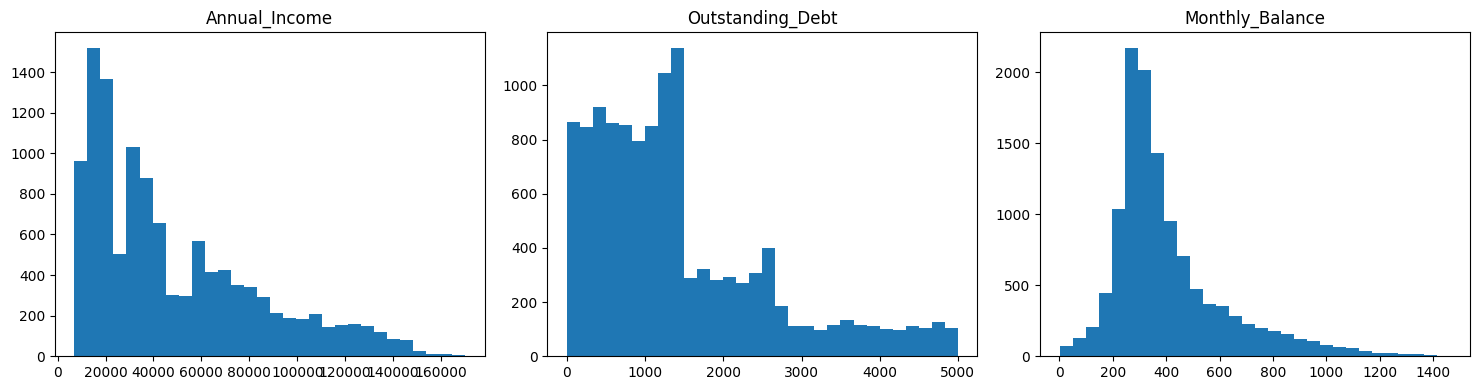

In [21]:
import matplotlib.pyplot as plt

pandas_df = df.select("Annual_Income", "Outstanding_Debt", "Monthly_Balance").toPandas()
# assume pandas_df is your pandas DataFrame
pandas_df[["Annual_Income","Outstanding_Debt","Monthly_Balance"]] \
    .hist(bins=30, layout=(1, 3), figsize=(15, 4), grid=False)

plt.tight_layout()
plt.show()

## EDA : Box‐plots of debt by credit mix

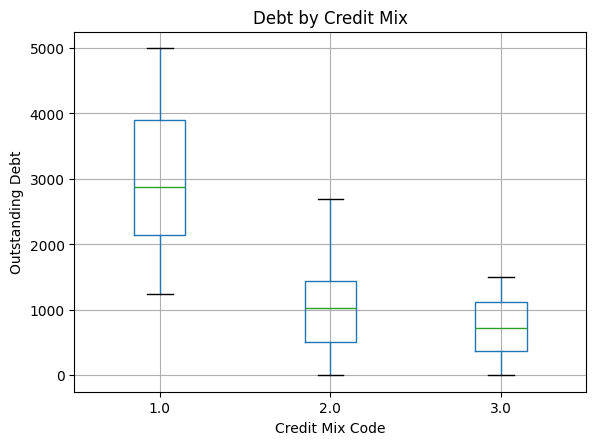

In [22]:
# Convert Spark to pandas
df_pd = df.select("Outstanding_Debt", "new_Credit_Mix_code").toPandas()

# Plot the boxplot
import matplotlib.pyplot as plt

df_pd.boxplot(column="Outstanding_Debt", by="new_Credit_Mix_code")
plt.title("Debt by Credit Mix")
plt.suptitle("")  # remove automatic suptitle
plt.xlabel("Credit Mix Code")
plt.ylabel("Outstanding Debt")
plt.show()


## EDA : Behavioral Risk Profiling

In [23]:
df.groupBy("new_Payment_Behaviour_code") \
  .agg({"Annual_Income": "avg", "Outstanding_Debt": "avg"}) \
  .orderBy("new_Payment_Behaviour_code") \
  .show()


+--------------------------+------------------+---------------------+
|new_Payment_Behaviour_code|avg(Annual_Income)|avg(Outstanding_Debt)|
+--------------------------+------------------+---------------------+
|                      NULL|  49566.2986490015|   1412.2754466312879|
|                         1|31932.362493547942|   1620.4233938256575|
|                         2| 52188.07070897306|    1436.855605309767|
|                         3|45433.483284733695|   1397.8322865620087|
|                         4|   46389.776640625|   1387.2364429179286|
|                         5|  56005.1077111834|   1316.2526573319933|
|                         6| 69962.19211381735|   1261.9965299304974|
+--------------------------+------------------+---------------------+



## EDA : Age Bucket vs Credit History

In [24]:
df.withColumn("age_bucket", 
    when(col("Age") < 25, "<25")
   .when(col("Age") < 40, "25-39")
   .when(col("Age") < 60, "40-59")
   .otherwise("60+")
).groupBy("age_bucket") \
 .agg({"new_credit_history_months": "avg", "new_loan_to_income_ratio": "avg"}) \
 .show()

+----------+------------------------------+-----------------------------+
|age_bucket|avg(new_credit_history_months)|avg(new_loan_to_income_ratio)|
+----------+------------------------------+-----------------------------+
|     25-39|            217.00741463414633|          0.06650251003759954|
|       <25|            203.55919661733614|           0.0731140123165908|
|       60+|                      223.0625|          0.06404109320158229|
|     40-59|            251.29268950633937|          0.04584632158196279|
+----------+------------------------------+-----------------------------+



## EDA : Feature Combination Heatmap (Correlation)

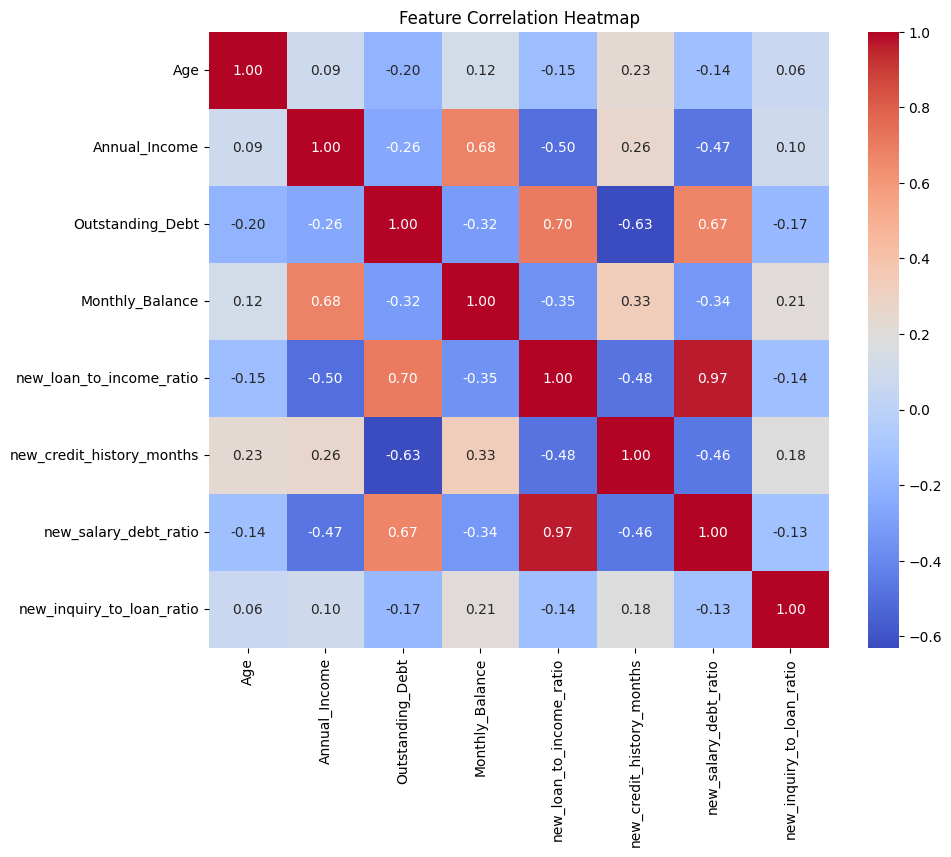

In [25]:
numerics = [
    "Age", "Annual_Income", "Outstanding_Debt", "Monthly_Balance",
    "new_loan_to_income_ratio", "new_credit_history_months",
    "new_salary_debt_ratio", "new_inquiry_to_loan_ratio"
]
df_pd = df.select(numerics).toPandas()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df_pd.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


## Build gold table for labels

In [26]:
# create bronze datalake
gold_feature_store_directory = "datamart/gold/features_store/"

if not os.path.exists(gold_feature_store_directory):
    os.makedirs(gold_feature_store_directory)

In [27]:
# run gold backfill
for date_str in dates_str_lst:
    utils.data_processing_gold_table.process_features_gold_table(date_str,silver_features_clickstream_directory, silver_features_directory, gold_feature_store_directory, spark)


Features rows:    530
Clickstream rows: 8974
After join rows: 530
Saved gold features to: datamart/gold/features_store/gold_features_store_2023_01_01.parquet
Features rows:    501
Clickstream rows: 8974
After join rows: 501
Saved gold features to: datamart/gold/features_store/gold_features_store_2023_02_01.parquet
Features rows:    506
Clickstream rows: 8974
After join rows: 506
Saved gold features to: datamart/gold/features_store/gold_features_store_2023_03_01.parquet
Features rows:    510
Clickstream rows: 8974
After join rows: 510
Saved gold features to: datamart/gold/features_store/gold_features_store_2023_04_01.parquet
Features rows:    521
Clickstream rows: 8974
After join rows: 521
Saved gold features to: datamart/gold/features_store/gold_features_store_2023_05_01.parquet
Features rows:    517
Clickstream rows: 8974
After join rows: 517
Saved gold features to: datamart/gold/features_store/gold_features_store_2023_06_01.parquet
Features rows:    471
Clickstream rows: 8974
After j

In [28]:
utils.data_processing_gold_table.process_features_gold_table(date_str,silver_features_clickstream_directory, silver_features_directory, gold_feature_store_directory, spark).dtypes


Features rows:    515
Clickstream rows: 8974
After join rows: 515
Saved gold features to: datamart/gold/features_store/gold_features_store_2024_12_01.parquet


[('Customer_ID', 'string'),
 ('snapshot_date', 'date'),
 ('Age', 'int'),
 ('Annual_Income', 'float'),
 ('Monthly_Inhand_Salary', 'float'),
 ('Num_Bank_Accounts', 'int'),
 ('Num_Credit_Card', 'int'),
 ('Interest_Rate', 'int'),
 ('Num_of_Loan', 'int'),
 ('Delay_from_due_date', 'int'),
 ('Num_of_Delayed_Payment', 'int'),
 ('Changed_Credit_Limit', 'float'),
 ('Num_Credit_Inquiries', 'int'),
 ('Outstanding_Debt', 'float'),
 ('Credit_Utilization_Ratio', 'float'),
 ('Total_EMI_per_month', 'float'),
 ('Amount_invested_monthly', 'float'),
 ('Monthly_Balance', 'float'),
 ('new_loan_to_income_ratio', 'float'),
 ('new_loan_type_count', 'int'),
 ('new_salary_debt_ratio', 'float'),
 ('new_inquiry_to_loan_ratio', 'float'),
 ('new_credit_history_months', 'int'),
 ('new_Payment_Behaviour_code', 'int'),
 ('new_Payment_of_Min_Amount_code', 'int'),
 ('new_Credit_Mix_code', 'int'),
 ('new_Occupation_code', 'int'),
 ('fe_1', 'int'),
 ('fe_2', 'int'),
 ('fe_3', 'int'),
 ('fe_4', 'int'),
 ('fe_5', 'int'),
 ('

## inspect feature store

In [29]:
folder_path = gold_feature_store_directory
files_list = [folder_path+os.path.basename(f) for f in glob.glob(os.path.join(folder_path, '*'))]
df = spark.read.option("header", "true").parquet(*files_list)
print("row_count:",df.count())

df.show()

row_count: 11974
+-----------+-------------+---+-------------+---------------------+-----------------+---------------+-------------+-----------+-------------------+----------------------+--------------------+--------------------+----------------+------------------------+-------------------+-----------------------+---------------+------------------------+-------------------+---------------------+-------------------------+-------------------------+--------------------------+------------------------------+-------------------+-------------------+----+----+----+----+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|Customer_ID|snapshot_date|Age|Annual_Income|Monthly_Inhand_Salary|Num_Bank_Accounts|Num_Credit_Card|Interest_Rate|Num_of_Loan|Delay_from_due_date|Num_of_Delayed_Payment|Changed_Credit_Limit|Num_Credit_Inquiries|Outstanding_Debt|Credit_Utilization_Ratio|Total_EMI_per_month|Amount_invested_monthly|Monthly_Balance|new_loan_to_income_ratio|n

In [30]:
df.printSchema()

root
 |-- Customer_ID: string (nullable = true)
 |-- snapshot_date: date (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Annual_Income: float (nullable = true)
 |-- Monthly_Inhand_Salary: float (nullable = true)
 |-- Num_Bank_Accounts: integer (nullable = true)
 |-- Num_Credit_Card: integer (nullable = true)
 |-- Interest_Rate: integer (nullable = true)
 |-- Num_of_Loan: integer (nullable = true)
 |-- Delay_from_due_date: integer (nullable = true)
 |-- Num_of_Delayed_Payment: integer (nullable = true)
 |-- Changed_Credit_Limit: float (nullable = true)
 |-- Num_Credit_Inquiries: integer (nullable = true)
 |-- Outstanding_Debt: float (nullable = true)
 |-- Credit_Utilization_Ratio: float (nullable = true)
 |-- Total_EMI_per_month: float (nullable = true)
 |-- Amount_invested_monthly: float (nullable = true)
 |-- Monthly_Balance: float (nullable = true)
 |-- new_loan_to_income_ratio: float (nullable = true)
 |-- new_loan_type_count: integer (nullable = true)
 |-- new_salary_deb

In [34]:
!pip install nbconvert


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [38]:
!jupyter nbconvert --to script 'data_processing_main_features.ipynb'

[NbConvertApp] Converting notebook data_processing_main_features.ipynb to script
[NbConvertApp] Writing 8594 bytes to data_processing_main_features.py
